#                                    ADS Assignment-1 TESLA STOCK ANALYSIS

**SAIHARISH SENTHILKUMARAN 21023211**

In [180]:
import pandas as pd
import numpy as np
import plotly as pl
import mplfinance as mpf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [190]:
df = pd.read_csv('Tesla-dataset.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/6/2017,49.582001,50.340000,49.501999,50.242001,50.242001,16777500
1,3/7/2017,50.383999,50.778000,49.664001,49.717999,49.717999,17297500
2,3/8/2017,49.400002,50.014000,49.063999,49.374001,49.374001,18626000
3,3/9/2017,49.526001,49.731998,48.599998,48.980000,48.980000,19396500
4,3/10/2017,49.242001,49.299999,48.599998,48.737999,48.737999,15331500


In [182]:
class Tesla_Stock_Analysis:
    
    #Init Method for creating instance of class
    def __init__(self):
        pass
    
    # Read and Convert the CSV file data into Panda Dataframe
    def read_stock_data_from_CSV(self, fileName):
        pd_data = pd.read_csv(fileName)
        analysis_df = pd.DataFrame(pd_data)
        return analysis_df
    
    # Data Preparation and cleaning
    def data_cleaning_and_preparation(self, stock_dataframe):
        # info() to see information of this dataframe
        print(" -- STOCK DATAFRAME INFO -- ", stock_dataframe.info())
        # shape() to see structure of this dataframe
        print("\n -- STOCK DATAFRAME SHAPE -- ", stock_dataframe.shape)
        # columns present in this dataframe
        print("\n -- DATAFRAME COLUMNS -- ", stock_dataframe.columns)
        
        # We can check the first non empty index in the series as following
        stock_dataframe.Open.first_valid_index()
        stock_dataframe.High.first_valid_index()
        stock_dataframe.Low.first_valid_index()
        stock_dataframe.Close.first_valid_index()
        
        # lets use the appropriate null value checking funtion i.e. isnull() 
        print("\n -- Any Null values in Dataframe -- ", stock_dataframe.isnull().sum())
    
    # Remove unneccessary columns in dataframes no-use in future analysis
    def remove_column_from_dataframe(self, stock_dataframe, columnName):
        return stock_dataframe.drop([columnName], axis=1, inplace = True)
    
    # Mean analysis of the given Dataframe based on closing, open and volume
    def mean_analysis_by_year(self, stock_dataframe):
        avg_analysis_df = stock_dataframe.groupby('year')[['Date', 'Open', 'Close', 'Volume']].mean()
        print("------------------MEAN ANALYSIS BY YEAR FOR OPEN, CLOSE & VOLUME-----------------")
        print(avg_analysis_df)
        print("---------------------------------------------------------------------------------")
        self.plot_line_chart('YEAR', 'MARKET CLOSE PRICE HISTORY [$]', 'TESLA STOCKS', avg_analysis_df)
   
    # Plotting line chart based on Mean closing price of given stocks 
    def plot_line_chart(self, xlabel, ylabel, title, stock_dataframe):
        plt.title(title)
        plt.xlabel(xlabel, fontsize = 13)
        plt.ylabel(ylabel, fontsize = 13)
        plt.plot(stock_dataframe.index, stock_dataframe['Close'], 'o-g')
        plt.savefig("LINE1.png")
        plt.show()
        plt.close()
    
    # Plotting the Daily Returns in the form of Line chart
    def plotting_daily_returns(self, stock_dataframe):
        stock_dataframe['Day_Perc_Change'].hist(bins = 50, figsize = (8,5))
        plt.title('RISE AND FALL OF THE STOCKS')
        plt.xlabel('Daily returns')
        plt.ylabel('Frequency')
        plt.savefig("daily_returns.png")
        plt.show()
        #statistics to retrieve the mean, SD,Max, min from hist
        print(stock_dataframe.Day_Perc_Change.describe())
        plt.close()
        
    # Plotting overall stocks to understand which year have maximum and minimum stock price closed
    def plotting_overall_stock_close_price(self, stock_dataframe):
        plt.figure(figsize=(26,18))
        plt.title('TESLA Stocks for past 5 Years', fontsize = 28)
        plt.xlabel('YEAR', fontsize=26)
        plt.ylabel('CLOSING PRICE IN USD($)', fontsize=26)
        plt.plot(stock_dataframe['Date'], stock_dataframe['Close']);
        plt.savefig("overall.png")
        plt.show()
        plt.close()
    
    # Trading analysis using Candle chart to figure out the buy and sell trade for stock in period of '07-20 to 02-22'
    def stock_chart_analysis(self, stock_dataframe):
        stock_dataframe=stock_dataframe.set_index('Date')
        mpf.plot(stock_dataframe['2020-07':'2022-02'],type ='candle', ylabel = 'Price in USD($)',
                 title = 'Tesla Stocks FY20 - FY22',tight_layout=True,
                 volume = True,mav = (20,5),style = 'yahoo',show_nontrading = True) #, savefig = 'Market-Analysis.png')
        
    
    # Comparing two year volume total close distribution to figure out dfrequency 
    def comparing_two_year_closing_distribution_price(self, stock_dataframe, year1, year2):
        year_1 = stock_dataframe[stock_dataframe.year == year1]
        year_2 = stock_dataframe[stock_dataframe.year == year2]
        plt.title("Distribution of Close Price")
        plt.hist(year_1.Close, alpha=0.4);
        plt.hist(year_2.Close, alpha=0.4);
        plt.xlabel("CLOSING PRICE")
        plt.ylabel("FREQUENCY DISTRIBUTION VOLUME")
        plt.legend([year1, year2]);
        plt.savefig("two_year_dp.png")
    


**Main function Creating instance of the class Tesla Stock Analysis and invoking Data cleaning and Data Preparation then visualize the Data for better interpreting and Understanding for future prediction of stocks.**

In [199]:
if __name__ == "__main__":
    
    # Object name for reference, invoking init method for creating instance 
    tsa_Object = Tesla_Stock_Analysis()
    
    #read file name dynamically from user
    fileName = input("Enter the File Name for Analysis ->\n")
    print(fileName)
    
    # convert the CSV file into Panda Dataframes for Analysis
    stock_analysis_dataFrame = tsa_Object.read_stock_data_from_CSV(fileName)
    
    # Before visualizing it make the dataframe apt for analysis and remove the unused columns & null values 
    tsa_Object.data_cleaning_and_preparation(stock_analysis_dataFrame)
    
    # copy original dataframe for analysis keep the original dataframe untouched
    stock_analysis_df = stock_analysis_dataFrame.copy()
    
    # create a new column 'Day Percentage change' by calculating the Adj close.pct_change * 100
    stock_analysis_df['Day_Perc_Change'] = stock_analysis_dataFrame['Adj Close'].pct_change()*100
    stock_analysis_df.dropna(axis = 0, inplace = True) # drop the first column because initially the Day-percentage is NAN
    
    '''Retrieve the Day, Month, Year, weekend
    from Date column using to_DateTime in-built method for plotting'''
    stock_analysis_df['Date'] = pd.to_datetime(stock_analysis_df.Date)
    stock_analysis_df['year'] = pd.DatetimeIndex(stock_analysis_df.Date).year
    stock_analysis_df['month'] = pd.DatetimeIndex(stock_analysis_df.Date).month
    stock_analysis_df['day'] = pd.DatetimeIndex(stock_analysis_df.Date).day
    stock_analysis_df['weekday'] = pd.DatetimeIndex(stock_analysis_df.Date).weekday
    
    # Total number of data day(s present in the dataframe for analysis
    total_stock_info = stock_analysis_df['Date'].count()
    print("------------------TOTAL STOCKS DATA GIVEN----------------------------------------")
    print("The total stocks data in given dataframe is {}".format(total_stock_info))
    print("---------------------------------------------------------------------------------")
    
      

Enter the File Name for Analysis ->
Tesla-dataset.csv
Tesla-dataset.csv
------------------TOTAL STOCKS DATA GIVEN----------------------------------------
The total stocks data in given dataframe is 1258
---------------------------------------------------------------------------------


# 1. What is the trend of the stock close prices in regard to last five years?

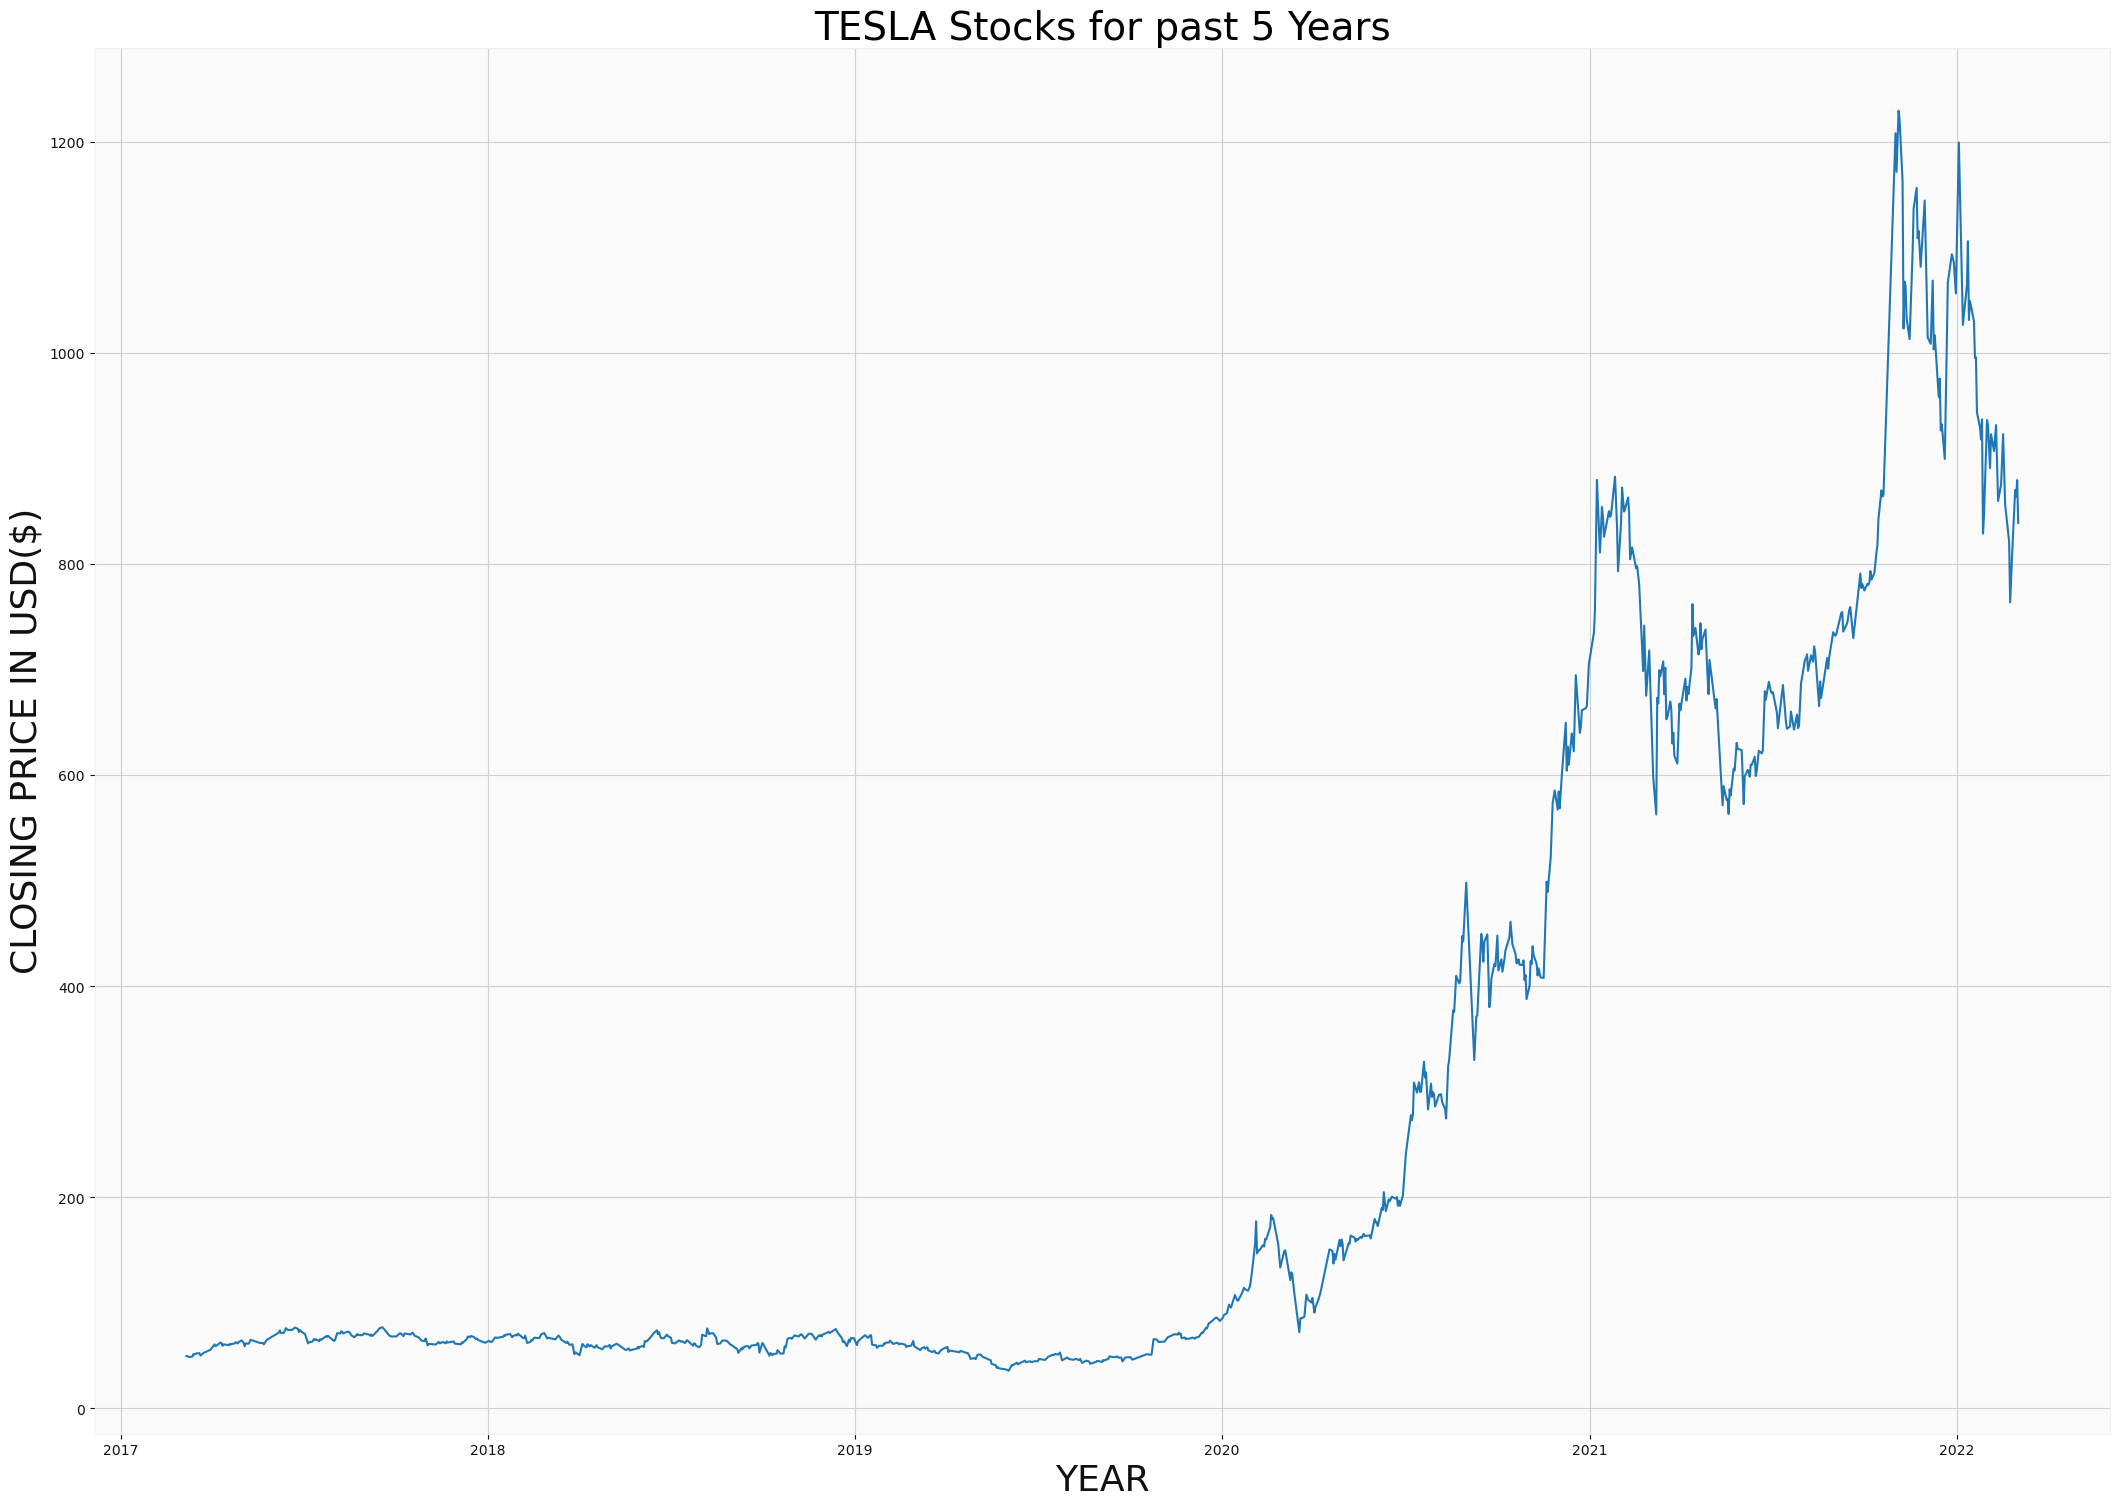

In [194]:
# visualizing the closing price history of the given stocks
tsa_Object.plotting_overall_stock_close_price(stock_analysis_df)


# 2. What is the mean closing prices in each year?


**Mean analysis**
Lets find the average closing price, opening price and volume of traded stock of each year using mean() function also by making grouping them by year using groupby () function.
We can show the trend using line graph chart and visually see which year has the highest price of the stock.



------------------MEAN ANALYSIS BY YEAR FOR OPEN, CLOSE & VOLUME-----------------
            Open       Close        Volume
year                                      
2017   65.512750   65.474221  3.258114e+07
2018   63.436693   63.461984  4.306053e+07
2019   54.605627   54.706040  4.579461e+07
2020  289.108428  289.997067  7.530795e+07
2021  779.839286  779.994482  2.738758e+07
2022  945.137620  940.136427  2.791428e+07
---------------------------------------------------------------------------------


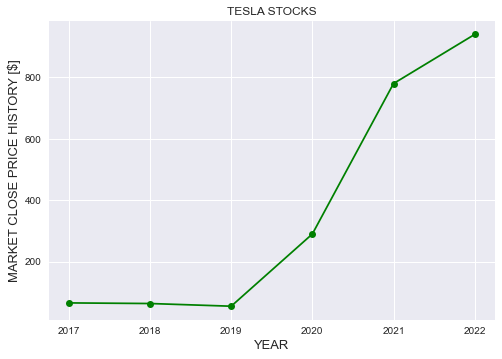

In [184]:
# Mean Analysis of given dataframe by year based on Open, Close, Volume
tsa_Object.mean_analysis_by_year(stock_analysis_df)


# 3. Visualize the Daily Returns using Frequency Distribution

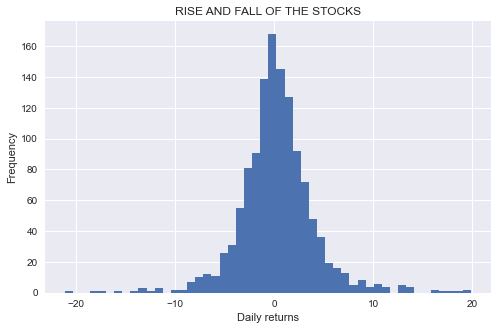

count    1258.000000
mean        0.298970
std         3.881595
min       -21.062826
25%        -1.653684
50%         0.160342
75%         1.982839
max        19.894863
Name: Day_Perc_Change, dtype: float64


In [185]:
# Analysing the Daily Returns and representing in form of plots
tsa_Object.plotting_daily_returns(stock_analysis_df)

# 4.Market Analysis of Tesla Stocks using Candle Chart

**Moving Average**
Low, High, Close trend had been visualized, with the help of candles we can easily figure out the moving average(MA).
MA helps us to understand the stock value in the market. In tesla stocks where the up trend had been always above the RSI value 

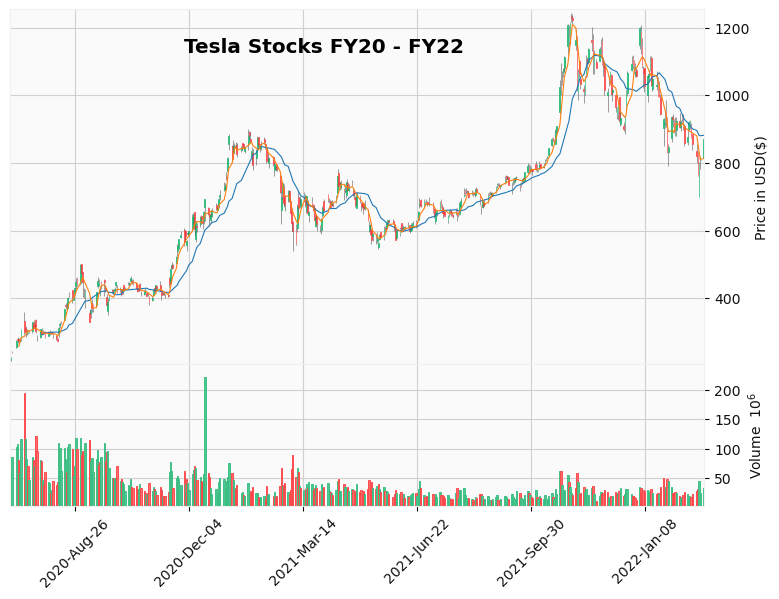

In [186]:
# Analysing the stock chart for given dataset using mplfinance lib
tsa_Object.stock_chart_analysis(stock_analysis_df)

# 5. Comparison Distribution Sum of Closing price values in each year

The overall distribtion of closing price in the yearly transitions and we can clearly see that price between 200 and 1200 are in more frequency throughout this makes us easy to sepearte the distribution according to range.

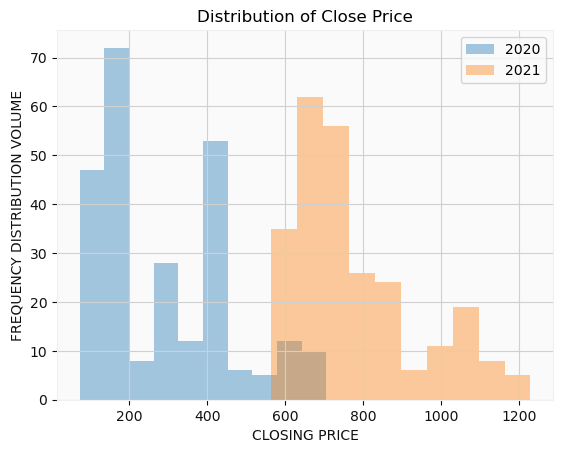

In [197]:
# closing frequency distribution between 2 years for better understanding of closing stocks
tsa_Object.comparing_two_year_closing_distribution_price(stock_analysis_df, 2020, 2021)
